In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df=pd.read_csv("full.csv")

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [49]:
l=['Name','PassengerId','Ticket','Name_wiki','Hometown','Boarded','Destination']
df=df.drop(l,axis=1)

In [50]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,WikiId,Age_wiki,Lifeboat,Body,Class
0,0.0,3,male,22.0,1,0,7.2500,NaN,S,691.0,22.0,NaN,NaN,3.0
1,1.0,1,female,38.0,1,0,71.2833,C85,C,90.0,35.0,4,NaN,1.0
2,1.0,3,female,26.0,0,0,7.9250,NaN,S,865.0,26.0,14?,NaN,3.0


In [51]:
df=df.drop('Cabin',axis=1)

In [52]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,WikiId,Age_wiki,Lifeboat,Body,Class
0,0.0,3,male,22.0,1,0,7.2500,S,691.0,22.0,NaN,NaN,3.0
1,1.0,1,female,38.0,1,0,71.2833,C,90.0,35.0,4,NaN,1.0
2,1.0,3,female,26.0,0,0,7.9250,S,865.0,26.0,14?,NaN,3.0


In [53]:
feature=df.drop('Survived',axis=1)
target=df['Survived']

In [54]:
feature.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,WikiId,Age_wiki,Lifeboat,Body,Class
0,3,male,22.0,1,0,7.2500,S,691.0,22.0,NaN,NaN,3.0
1,1,female,38.0,1,0,71.2833,C,90.0,35.0,4,NaN,1.0
2,3,female,26.0,0,0,7.9250,S,865.0,26.0,14?,NaN,3.0
3,1,female,35.0,1,0,53.1000,S,127.0,35.0,D,NaN,1.0
4,3,male,35.0,0,0,8.0500,S,627.0,35.0,NaN,NaN,3.0


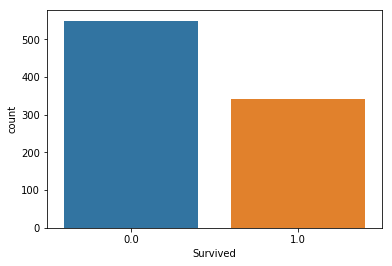

In [55]:
sns.countplot('Survived',data=df)

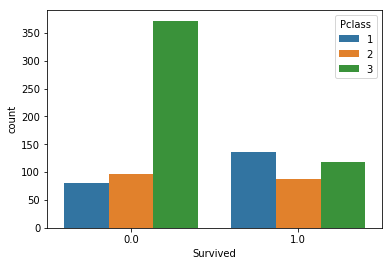

In [56]:
sns.countplot('Survived',hue='Pclass',data=df)

# most of the people from third class not suvived
# only the high class people mostly survived

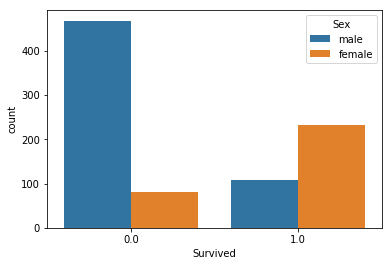

In [57]:
sns.countplot('Survived',hue='Sex',data=df)

# mostly the men are not survived
# the female survived  ratio is higher than the male mostly female is survived 

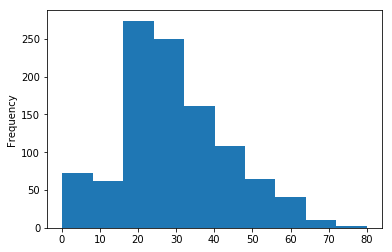

In [58]:
df['Age'].plot.hist()

# mostly the age of peopel in titantic is 20 to 40 means young persons has the maximum number in titanic ship

In [59]:
df.isnull().count()

Survived    1309
Pclass      1309
Sex         1309
Age         1309
SibSp       1309
Parch       1309
Fare        1309
Embarked    1309
WikiId      1309
Age_wiki    1309
Lifeboat    1309
Body        1309
Class       1309
dtype: int64

In [60]:
df.size

17017

In [61]:
df.isnull().any()

Survived     True
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked     True
WikiId       True
Age_wiki     True
Lifeboat     True
Body         True
Class        True
dtype: bool

In [62]:
#df.dropna(inplace=True)

In [63]:
df.isnull().count()

Survived    1309
Pclass      1309
Sex         1309
Age         1309
SibSp       1309
Parch       1309
Fare        1309
Embarked    1309
WikiId      1309
Age_wiki    1309
Lifeboat    1309
Body        1309
Class       1309
dtype: int64

In [64]:
from sklearn.preprocessing import Imputer

In [65]:
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer=imputer.fit(df[['Age','Fare']])
df[['Age','Fare']]=imputer.transform(df[['Age','Fare']])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [66]:
df.isnull().any()

Survived     True
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
WikiId       True
Age_wiki     True
Lifeboat     True
Body         True
Class        True
dtype: bool

In [67]:
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer=imputer.fit(df[['Survived','Class']])
df[['Survived','Class']]=imputer.transform(df[['Survived','Class']])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [68]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
WikiId       True
Age_wiki     True
Lifeboat     True
Body         True
Class       False
dtype: bool

In [69]:
df.isnull().any().count()

13

In [70]:
df.dropna()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,WikiId,Age_wiki,Lifeboat,Body,Class
470,0.000000,3,male,29.881138,0,0,7.2500,S,927.0,39.0,A,332O,3.0
793,0.000000,1,male,29.881138,0,0,30.6958,C,168.0,42.0,14,[66][67],1.0
1009,0.383838,1,male,36.000000,0,0,75.2417,C,25.0,36.0,A[64],331O,1.0


In [71]:
df=df.drop('Body',axis=1)

In [72]:
df=df.drop('Lifeboat',axis=1)

In [73]:
df=df.drop('Class',axis=1)

In [74]:
df=df.drop('Age_wiki',axis=1)

In [75]:
df=df.drop('WikiId',axis=1)

In [76]:
n=float('nan')
df.replace("Q", n, inplace=True)
df['Embarked'].unique()

array(['S', 'C', nan], dtype=object)

In [77]:
a=df.dropna(inplace=True)

In [78]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
label=LabelEncoder()

In [81]:
df[['Sex']]=label.fit_transform(df[['Sex']])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,S
1,1.0,1,0,38.0,1,0,71.2833,C
2,1.0,3,0,26.0,0,0,7.9250,S
3,1.0,1,0,35.0,1,0,53.1000,S
4,0.0,3,1,35.0,0,0,8.0500,S


In [83]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,S
1,1.0,1,0,38.0,1,0,71.2833,C
2,1.0,3,0,26.0,0,0,7.9250,S
3,1.0,1,0,35.0,1,0,53.1000,S
4,0.0,3,1,35.0,0,0,8.0500,S


In [84]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df[['Embarked']]=label.fit_transform(df[['Embarked']])

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,22.0,1,0,7.2500,1
1,1.0,1,0,38.0,1,0,71.2833,0
2,1.0,3,0,26.0,0,0,7.9250,1
3,1.0,1,0,35.0,1,0,53.1000,1
4,0.0,3,1,35.0,0,0,8.0500,1


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
from sklearn.linear_model import LogisticRegression

In [89]:
feature=df.drop('Survived',axis=1)
target=df['Survived']

In [90]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.3)

In [91]:
print(x_train.size)
print(y_train.size)

5796
828


In [105]:
from sklearn import preprocessing
from sklearn import utils
lg=LogisticRegression()
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))
test_set=lab_enc.fit_transform(y_test)

[0 0 0 2 1 1 0 0 2 2 1 2 0 1 0 2 2 2 1 1 0 0 0 2 1 2 0 0 1 2 0 1 0 0 0 2 2
 1 1 1 0 1 0 1 2 1 2 0 2 0 0 0 0 0 2 1 2 0 1 0 1 1 1 0 0 1 0 2 2 0 0 1 0 1
 1 0 2 2 2 0 2 2 0 1 2 2 1 0 1 0 2 1 0 1 1 1 0 0 2 0 0 2 2 0 2 0 0 1 0 0 1
 1 2 1 1 2 1 1 1 1 2 1 0 0 2 0 0 1 1 0 0 0 0 2 2 0 2 0 0 2 1 2 1 0 2 0 0 1
 0 0 0 0 0 0 2 2 0 0 1 0 2 0 2 1 2 1 1 2 1 1 1 2 1 2 2 1 0 0 1 2 0 0 0 2 0
 2 1 0 0 0 2 1 0 0 0 0 1 2 2 1 0 1 0 1 0 2 2 1 0 1 1 1 0 0 0 0 1 2 1 2 1 0
 1 0 1 0 1 2 0 0 2 0 2 1 1 1 0 0 2 0 1 0 2 0 0 1 0 1 2 1 0 1 0 1 1 0 0 0 1
 0 0 1 1 0 2 2 0 1 0 0 1 1 0 0 2 1 2 1 0 1 2 2 1 0 2 1 0 2 2 0 0 2 2 0 0 1
 1 1 2 1 0 0 0 1 1 0 2 0 0 0 0 0 1 0 0 0 0 2 1 1 1 0 0 2 2 0 0 1 0 0 0 0 0
 1 2 2 0 0 0 2 0 2 1 2 1 0 1 1 2 1 0 0 0 0 0 1 0 0 1 0 2 0 0 0 1 2 0 0 0 1
 2 0 0 0 2 0 2 0 2 0 1 2 1 0 1 2 0 0 1 2 2 0 0 1 1 2 2 2 0 1 1 0 1 0 1 0 0
 1 2 1 0 2 1 2 1 1 1 0 0 1 2 1 0 0 0 0 2 0 2 0 1 2 2 2 2 2 2 1 1 1 2 2 2 1
 0 1 2 0 1 0 0 1 0 2 0 0 2 2 2 2 1 0 2 2 0 0 1 1 1 0 0 2 0 1 0 0 2 1 1 1 1
 1 1 0 1 0 2 2 1 0 2 2 1 

In [106]:
clf = LogisticRegression()
clf.fit(x_train, training_scores_encoded)
print("LogisticRegression")

LogisticRegression


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [110]:
pred=clf.predict(x_test)

In [113]:
from sklearn.metrics import classification_report
print(classification_report(test_set,pred))

              precision    recall  f1-score   support

           0       0.61      0.86      0.71       162
           1       0.56      0.08      0.15       119
           2       0.50      0.72      0.59        75

   micro avg       0.57      0.57      0.57       356
   macro avg       0.55      0.56      0.48       356
weighted avg       0.57      0.57      0.50       356



In [116]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_set,pred))

0.5730337078651685
